In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import statistics
from sklearn.preprocessing import normalize


import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [47]:

new_df = pd.read_csv('../normalized_data_2017_01.csv')

X, y = new_df.iloc[:, :-1], new_df.iloc[:, -1]

# default -> 8:2
# 5:5
# 6:4
# 4:6
# 3:7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.95, random_state = 123)

n_steps = X_train.shape[1]
n_features = 1

X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], n_features))




# model 1 50-1-1 - default

model = Sequential()
model.add(LSTM((50), activation='relu', batch_input_shape=(None, 6, 1), return_sequences=True))
model.add(LSTM((1),return_sequences=False))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

# model 2 25-1-1
# model.add(LSTM((25), activation='relu', batch_input_shape=(None, 6, 1), return_sequences=True))
# model.add(LSTM((1),return_sequences=False))
# model.add(Dense(1))

# model 3 100-1-1
# model.add(LSTM((100), activation='relu', batch_input_shape=(None, 6, 1), return_sequences=True))
# model.add(LSTM((1),return_sequences=False))
# model.add(Dense(1))




In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6, 50)             10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1)                 208       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 10,610
Trainable params: 10,610
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test)) # default

# history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Train on 4475 samples, validate on 85039 samples
Epoch 1/150
4475/4475 [==============================] - 6s 1ms/step - loss: 0.0076 - acc: 0.0000e+00 - val_loss: 0.0052 - val_acc: 0.0000e+00
Epoch 2/150
4475/4475 [==============================] - 4s 939us/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 3/150
4475/4475 [==============================] - 4s 950us/step - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 4/150
4475/4475 [==============================] - 4s 937us/step - loss: 0.0012 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 5/150
4475/4475 [==============================] - 4s 936us/step - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 9.9175e-04 - val_acc: 0.0000e+00
Epoch 6/150
4475/4475 [==============================] - 4s 935us/step - loss: 0.0010 - acc: 0.0000e+00 - val_loss: 9.5378e-04 - val_acc: 0.0000e+00
Epoch 7/150
4475/4475 [==============================] - 4s 935us/step - lo

4475/4475 [==============================] - 4s 936us/step - loss: 6.7422e-04 - acc: 0.0000e+00 - val_loss: 6.6521e-04 - val_acc: 1.1759e-05
Epoch 108/150
4475/4475 [==============================] - 4s 930us/step - loss: 6.5805e-04 - acc: 0.0000e+00 - val_loss: 7.0798e-04 - val_acc: 1.1759e-05
Epoch 109/150
4475/4475 [==============================] - 4s 931us/step - loss: 6.3032e-04 - acc: 0.0000e+00 - val_loss: 6.0897e-04 - val_acc: 1.1759e-05
Epoch 110/150
4475/4475 [==============================] - 4s 932us/step - loss: 6.4659e-04 - acc: 0.0000e+00 - val_loss: 6.3093e-04 - val_acc: 1.1759e-05
Epoch 111/150
4475/4475 [==============================] - 4s 933us/step - loss: 6.0415e-04 - acc: 0.0000e+00 - val_loss: 5.8191e-04 - val_acc: 1.1759e-05
Epoch 112/150
4475/4475 [==============================] - 4s 936us/step - loss: 6.0634e-04 - acc: 0.0000e+00 - val_loss: 5.7125e-04 - val_acc: 1.1759e-05
Epoch 113/150
4475/4475 [==============================] - 4s 932us/step - loss: 5.7

In [7]:
location43_df = pd.read_csv('../different_locations/normalized_location_43.csv')  # location
X_test_43, y_test_43 = location43_df.iloc[:, :-1], location43_df.iloc[:, -1]

location2_df = pd.read_csv('../different_locations/normalized_location_2.csv')  # location
X_test_2, y_test_2 = location2_df.iloc[:, :-1], location2_df.iloc[:, -1]

location161_df = pd.read_csv('../different_locations/normalized_location_161.csv')  # location
X_test_161, y_test_161 = location161_df.iloc[:, :-1], location161_df.iloc[:, -1]

location12_df = pd.read_csv('../different_locations/normalized_location_12.csv')  # location
X_test_12, y_test_12 = location12_df.iloc[:, :-1], location12_df.iloc[:, -1]

location132_df = pd.read_csv('../different_locations/normalized_location_132.csv')  # location
X_test_132, y_test_132 = location132_df.iloc[:, :-1], location132_df.iloc[:, -1]

location138_df = pd.read_csv('../different_locations/normalized_location_138.csv')  # location
X_test_138, y_test_138 = location138_df.iloc[:, :-1], location138_df.iloc[:, -1]


Test RMSE: 10.988136 
Test MAE: 9.46
Test MPE: 9.46


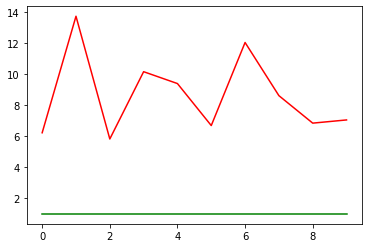

In [14]:
X_test = X_test_2.values.reshape((X_test_2.shape[0], X_test_2.shape[1], n_features))

results = model.predict(X_test)

real_y = y_test_2* 2149
real_predict = results*2149

testScore = math.sqrt(mean_squared_error(real_y[:], real_predict[:,0]))
testacc = statistics.mean(abs(real_y[:] - real_predict[:,0]))
#mean_percentage_error = statistics.mean(abs(real_y[:] - real_predict[:,0])/real_y[:])
mean_percentage_error = np.sum(abs(real_y[:] - real_predict[:,0]))/np.sum(real_y[:])

print('Test RMSE: %f ' % (testScore))
print('Test MAE: %.2f' % (testacc))
print('Test MPE: %.2f' % (mean_percentage_error))

plt.plot(range(10),real_predict[0:10,0], c='r')
plt.plot(range(10),real_y[0:10], c='g')
plt.show()

In [49]:
results = model.predict(X_test)

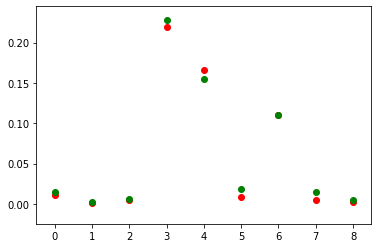

In [6]:
plt.scatter(range(9),results[0:9,0], c='r')
plt.scatter(range(9),y_test[0:9], c='g')
plt.show()

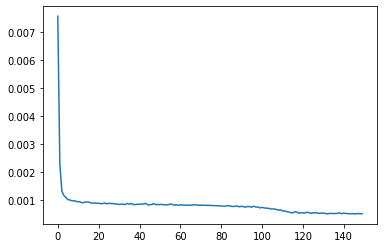

In [53]:
plt.plot(history.history['loss'])
plt.show()

In [52]:
testScore = math.sqrt(mean_squared_error(y_test[:], results[:,0]))
testacc = statistics.mean(abs(y_test[:] - results[:,0]))
mean_percentage_error = np.sum(abs(y_test[:] - results[:,0]))/np.sum(y_test[:])


RMSE = math.sqrt(mean_squared_error(y_test[:], results[:,0]))


MAE = statistics.mean(abs(y_test[:] - results[:,0]))


MPE = np.sum(abs(y_test[:] - results[:,0]))/np.sum(y_test[:])


print('Test RMSE: %f ' % (testScore))
print('Test MAE: %.2f' % (testacc))
print('Test MPE: %.2f' % (mean_percentage_error))

Test RMSE: 0.015059 
Test MAE: 0.01
Test MPE: 0.15


In [50]:
real_y = y_test* 2149

In [51]:
real_predict = results*2149

In [52]:
testScore = math.sqrt(mean_squared_error(real_y[:], real_predict[:,0]))
testacc = statistics.mean(abs(real_y[:] - real_predict[:,0]))
#mean_percentage_error = statistics.mean(abs(real_y[:] - real_predict[:,0])/real_y[:])
mean_percentage_error = np.sum(abs(y_test[:] - results[:,0]))/np.sum(y_test[:])


print('Test RMSE: %f ' % (testScore))
print('Test MAE: %.2f' % (testacc))
print('Test MPE: %.2f' % (mean_percentage_error))

Test RMSE: 47.780460 
Test MAE: 23.42
Test MPE: 0.22


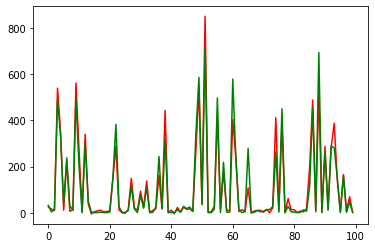

In [54]:
plt.plot(range(100),real_predict[0:100,0], c='r')
plt.plot(range(100),real_y[0:100], c='g')
plt.show()